# Project -2

# Name of Project- Wine Quality Prediction

### Description- On the weekend, most of us prefer having a fancy dinner with our  loved ones. While the kids define a fancy dinner as one that has pasta, adults  like to add a cherry on top by having a classic glass of red wine along with the  Italian dish. But when it comes to shopping for that wine bottle, a few of us get  confused about which is the best one to buy. Few believe that the longer it has  been fermented, the better it'll taste. Few suggest relatively sweeter wines are good quality wines. To know a precise answer, you can try building your wine Quality Predictor.

### Importing The Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing The DataSet

In [57]:
dataset = pd.read_csv("WineQT.csv")

In [58]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


### Drop The Id Column

In [59]:
dataset.drop('Id',axis=1,inplace=True)

In [60]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [61]:
dataset.shape

(1143, 12)

In [62]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [63]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Check for null values

In [64]:
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [65]:
dataset['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [66]:
dataset['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

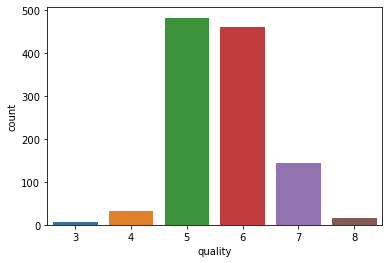

In [67]:
sns.countplot(dataset['quality'])

### Observations From Above Graph:
  ### The above graph shows that the quality 5 has more instances

In [68]:
numerical_data=[feature for feature in dataset.columns if dataset[feature].dtype!='O']

In [69]:
len(numerical_data)

12

In [70]:
descrete_data=[feature for feature in numerical_data if len(dataset[feature].unique()) <= 25]

In [71]:
descrete_data

['quality']

In [72]:
continouse_data=[feature for feature in numerical_data if feature not in descrete_data]

In [73]:
len(continouse_data)

11

### Observing The Distributions of Continouse Columns in our Dataset

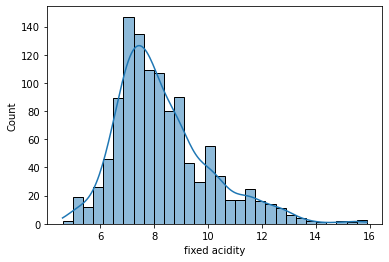

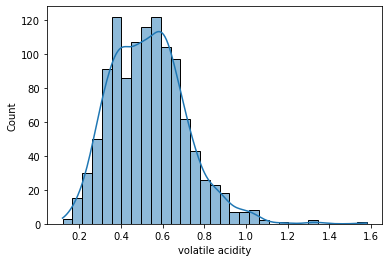

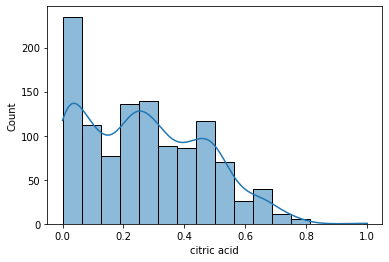

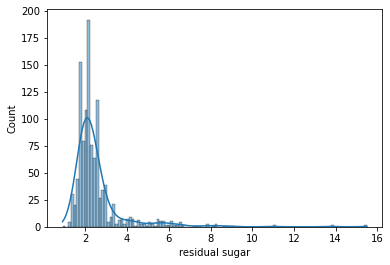

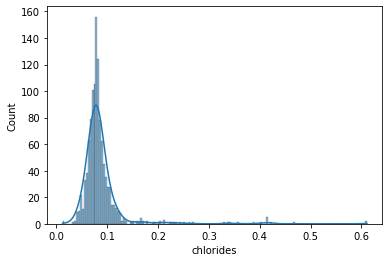

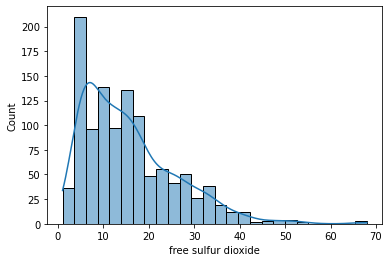

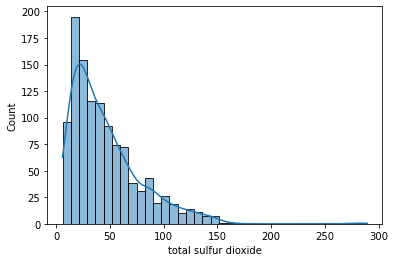

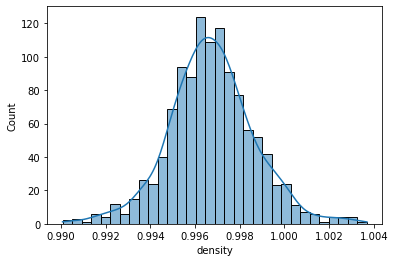

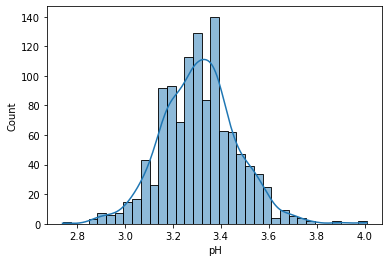

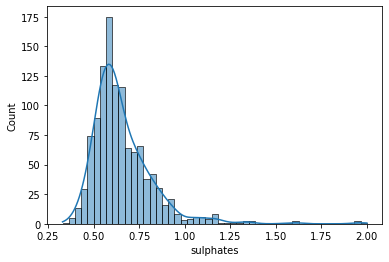

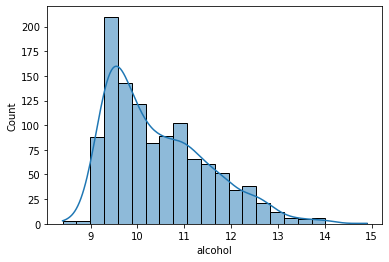

In [74]:
for col in continouse_data:
    sns.histplot(dataset[col],kde=True)
    plt.show()

### Checking For The Outliers Present in Our Continouse Columns

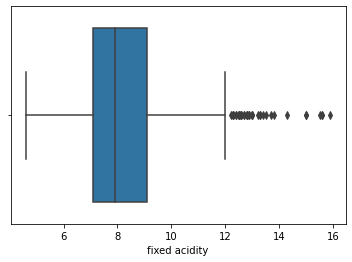

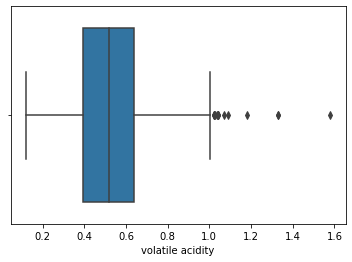

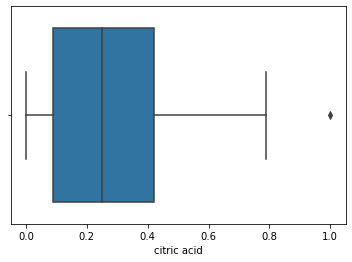

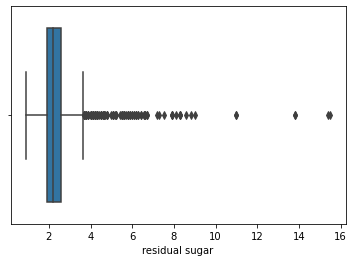

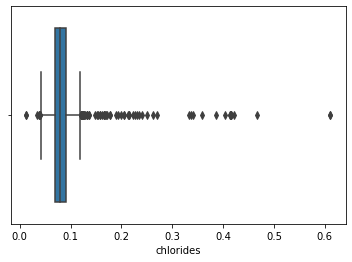

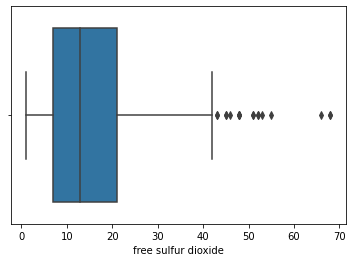

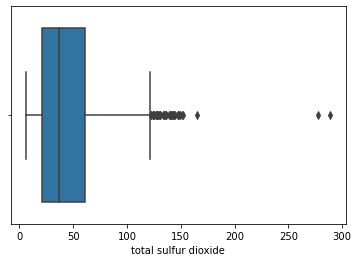

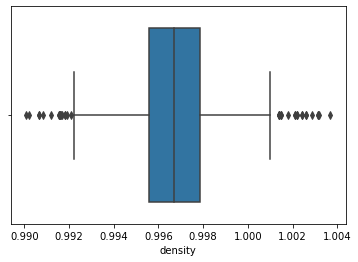

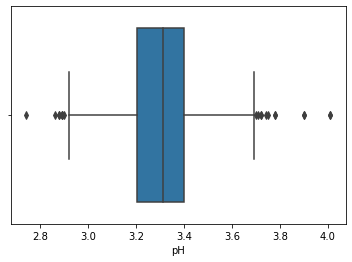

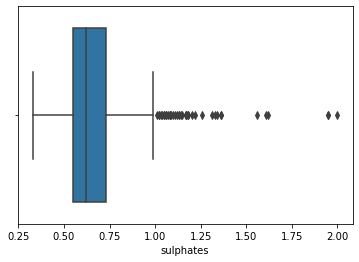

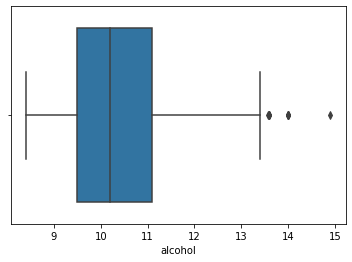

In [75]:
for col in continouse_data:
    sns.boxplot(dataset[col])
    plt.show()


In [76]:
l=['sulphates','pH','density','total sulfur dioxide','chlorides','residual sugar','fixed acidity']


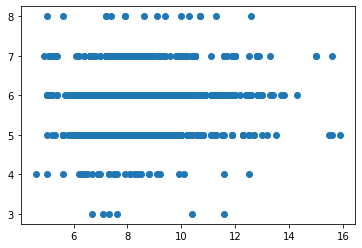

In [77]:
plt.scatter(dataset['fixed acidity'],dataset['quality'])
plt.show()

### The Given DataSet is an imbalanced Dataset, so we have used oversampling technique as shown below

In [100]:
[5, 6, 7, 4, 8, 3]
count_5,count_6,count_7,count_4,count_8,count_3=dataset['quality'].value_counts()

In [101]:
df_class_5=dataset[dataset['quality'] == 5]
df_class_6=dataset[dataset['quality'] == 6]
df_class_7=dataset[dataset['quality'] == 7]
df_class_4=dataset[dataset['quality'] == 4]
df_class_8=dataset[dataset['quality'] == 8]
df_class_3=dataset[dataset['quality'] == 3]

In [102]:
count_5,count_6,count_7,count_4,count_8,count_3

(483, 462, 143, 33, 16, 6)

In [103]:
df_class_5.shape,df_class_6.shape,df_class_7.shape,df_class_4.shape,df_class_8.shape,df_class_3.shape

((483, 12), (462, 12), (143, 12), (33, 12), (16, 12), (6, 12))

In [104]:
df_class_7_over=df_class_7.sample(count_5,replace=True)
df_class_4_over=df_class_4.sample(count_5,replace=True)
df_class_8_over=df_class_8.sample(count_5,replace=True)
df_class_3_over=df_class_3.sample(count_5,replace=True)

In [106]:
df_class_5.shape,df_class_6.shape,df_class_7_over.shape,df_class_4_over.shape,df_class_8_over.shape,df_class_3_over.shape

((483, 12), (462, 12), (483, 12), (483, 12), (483, 12), (483, 12))

In [109]:
data_over=pd.concat([df_class_5,df_class_6,df_class_7_over,df_class_4_over,df_class_8_over,df_class_3_over],axis=0)

In [110]:
data_over

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.80,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.80,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.40,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.40,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1074,6.7,0.760,0.02,1.8,0.078,6.0,12.0,0.99600,3.55,0.63,9.95,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1055,7.1,0.875,0.05,5.7,0.082,3.0,14.0,0.99808,3.40,0.52,10.20,3
1046,7.3,0.980,0.05,2.1,0.061,20.0,49.0,0.99705,3.31,0.55,9.70,3


In [111]:
data_over.shape

(2877, 12)

### Separating the Independent Features and Dependent Features

In [112]:
x=data_over.iloc[:,:-1].values
y=data_over.iloc[:,-1].values

### Dividing the data for training and testing

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42,stratify=y)

### Scaling the data

In [114]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)

In [115]:
x_test=sc.transform(x_test)

### Fitting The Model

In [116]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion='gini')
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

### Prdicting the results for test dataset

In [117]:
y_pred=model.predict(x_test)

In [118]:
y_pred

array([6, 4, 4, 7, 7, 8, 8, 6, 6, 3, 4, 8, 5, 5, 7, 7, 8, 4, 5, 3, 6, 6,
       7, 8, 7, 7, 3, 7, 6, 5, 3, 8, 4, 4, 4, 5, 4, 5, 4, 8, 4, 5, 5, 3,
       5, 8, 3, 6, 7, 5, 6, 7, 8, 7, 5, 3, 3, 5, 3, 7, 7, 8, 5, 6, 7, 4,
       6, 7, 4, 4, 3, 5, 3, 4, 7, 4, 3, 4, 4, 8, 3, 8, 5, 5, 4, 3, 7, 8,
       8, 4, 4, 3, 5, 5, 5, 5, 7, 3, 6, 5, 4, 7, 4, 6, 8, 5, 3, 6, 8, 5,
       7, 3, 4, 5, 6, 4, 3, 5, 3, 3, 5, 3, 7, 4, 7, 5, 6, 7, 5, 8, 3, 4,
       3, 7, 7, 5, 6, 8, 8, 4, 3, 8, 8, 6, 7, 6, 4, 4, 3, 5, 8, 3, 3, 8,
       7, 3, 4, 3, 4, 7, 4, 7, 3, 7, 8, 3, 3, 6, 6, 6, 6, 3, 4, 8, 5, 7,
       6, 8, 6, 3, 5, 8, 3, 8, 8, 6, 7, 7, 6, 3, 8, 7, 6, 7, 8, 5, 4, 8,
       3, 5, 4, 7, 3, 5, 7, 5, 7, 6, 7, 8, 3, 8, 6, 7, 8, 8, 5, 7, 5, 6,
       4, 7, 6, 8, 8, 4, 3, 5, 5, 7, 6, 8, 5, 3, 4, 6, 5, 7, 3, 4, 3, 4,
       5, 7, 4, 4, 8, 8, 3, 7, 3, 3, 4, 8, 5, 4, 8, 8, 7, 6, 4, 6, 8, 5,
       7, 3, 4, 5, 3, 7, 7, 6, 3, 3, 8, 5, 6, 3, 4, 5, 4, 7, 5, 3, 8, 5,
       6, 5, 8, 5, 5, 3, 3, 7, 5, 3, 6, 5, 5, 5, 8,

### Accuracy Of The Model

In [119]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
acc=accuracy_score(y_test,y_pred)
print(acc)

0.8784722222222222


### Confusion Matrix of our Model

In [120]:
cm=confusion_matrix(y_test,y_pred)

In [121]:
cm

array([[97,  0,  0,  0,  0,  0],
       [ 0, 96,  0,  0,  0,  0],
       [ 1,  0, 70, 25,  1,  0],
       [ 0,  2, 28, 52, 10,  0],
       [ 0,  0,  0,  3, 94,  0],
       [ 0,  0,  0,  0,  0, 97]], dtype=int64)

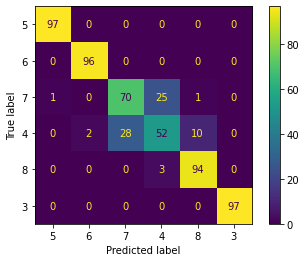

In [122]:
from sklearn import metrics
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels=[5, 6, 7, 4, 8, 3])

cm_display.plot()

### Classification Report Of Our Model

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.99      1.00      0.99        97
           4       0.98      1.00      0.99        96
           5       0.71      0.72      0.72        97
           6       0.65      0.57      0.60        92
           7       0.90      0.97      0.93        97
           8       1.00      1.00      1.00        97

    accuracy                           0.88       576
   macro avg       0.87      0.88      0.87       576
weighted avg       0.87      0.88      0.88       576

